# Final Project Report

* Class: DS 5100
* Student Name: Matt Lang
* Student Net ID: yvy7zh
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/mattlang108/MonteCarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [14]:
import numpy as np
import pandas as pd
import random
import unittest

class Die:
    """
    A class representing a die with a set of faces and weights.
    
    Attributes:
        faces (numpy.ndarray): The faces of the die.
        weights (numpy.ndarray): The weights associated with each face. Defaults to 1.
    """
    
    def __init__(self, faces: np.ndarray):
        """
        Initializes the Die object with a set of faces and default weights.
        
        Args:
            faces (numpy.ndarray): A NumPy array containing the faces of the die.
        
        Raises:
            TypeError: If faces is not a numpy array.
            ValueError: If the faces are not unique.
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces must be a NumPy array.")
        if len(faces) != len(set(faces)):
            raise ValueError("Faces must be distinct.")
        
        self.faces = faces
        self.weights = np.ones(len(faces))
        self.df = pd.DataFrame({'faces': faces, 'weights': self.weights}).set_index('faces')
    
    def change_weight(self, face, new_weight):
        """
        Changes the weight of a specific face on the die.
        
        Args:
            face (str or int): The face whose weight is to be changed.
            new_weight (float): The new weight for the face.
        
        Raises:
            IndexError: If the face is not found.
            TypeError: If new_weight is not numeric.
        """
        if face not in self.df.index:
            raise IndexError(f"Face {face} not found in die.")
        if not isinstance(new_weight, (int, float, np.int64)):
            raise TypeError("Weight must be numeric.")
        self.df.loc[face, 'weights'] = new_weight
    
    def roll(self, times=1):
        """
        Rolls the die a specified number of times, returning the outcome.
        
        Args:
            times (int): The number of times to roll the die.
        
        Returns:
            list: A list of rolled outcomes.
        """
        return random.choices(self.df.index, weights=self.df['weights'], k=times)
    
    def show(self):
        """
        Shows the current faces and their associated weights.
        
        Returns:
            pandas.DataFrame: A DataFrame showing the faces and weights of the die.
        """
        return self.df.copy()


class Game:
    """
    A class that simulates a dice game with multiple dice.
    
    Attributes:
        dice (list): A list of Die objects.
        play_data (pandas.DataFrame): Stores the results of the rolls.
    """
    
    def __init__(self, dice: list):
        """
        Initializes the game with a list of dice.
        
        Args:
            dice (list): A list of Die objects.
        
        Raises:
            TypeError: If any element in dice is not a Die object.
            ValueError: If the dice do not have the same faces.
        """
        if not all(isinstance(die, Die) for die in dice):
            raise TypeError("All elements must be Die objects")
        
        faces_set = {tuple(die.faces) for die in dice}
        if len(faces_set) != 1:
            raise ValueError("All dice must have the same faces.")
        
        self.dice = dice
        self.play_data = None
    
    def play(self, num_rolls):
        """
        Rolls all dice a specified number of times and stores the results.
        
        Args:
            num_rolls (int): The number of times to roll all dice.
        """
        results = {}
        for idx, die in enumerate(self.dice):
            results[idx] = die.roll(num_rolls)
        self.play_data = pd.DataFrame(results)
        return self.play_data
    
    def show_results(self, format='wide'):
        """
        Returns the results of the rolls in either wide or narrow format.
        
        Args:
            format (str): The format of the result, either 'wide' or 'narrow' (default is 'wide').
        
        Returns:
            pandas.DataFrame: A DataFrame with the results in the specified format.
        
        Raises:
            ValueError: If an invalid format is specified.
        """
        if self.play_data is None:
            raise ValueError("No results to show. Please play the game first.")
        if format == 'wide':
            return self.play_data
        elif format == 'narrow':
            return self.play_data.stack().reset_index(name='Outcome').rename(columns={'level_0': 'Roll', 'level_1': 'Die'})
        else:
            raise ValueError("Invalid format specified")


class Analyzer:
    """
    A class to analyze the results of a dice game.
    
    Attributes:
        game (Game): The Game object that stores the results to analyze.
        results (pandas.DataFrame): Stores the results of the game rolls.
    """
    
    def __init__(self, game: Game):
        """
        Initializes the analyzer with a game.
        
        Args:
            game (Game): A Game object.
        
        Raises:
            ValueError: If the input is not a Game object.
        """
        if not isinstance(game, Game):
            raise ValueError("The input must be a Game object.")
        self.game = game
        self.results = game.play_data
    
    def jackpot(self):
        """
        Computes the number of jackpots (all faces the same).
        
        Returns:
            int: The number of jackpots.
        """
        return sum(self.results.nunique(axis=1) == 1)
    
    def face_counts_per_roll(self):
        """
        Computes how many times each face is rolled in each event.
        
        Returns:
            pandas.DataFrame: A DataFrame with face counts for each roll in wide format.
        """
        return self.results.apply(lambda row: row.value_counts(), axis=1).fillna(0)
    
    def combo_count(self):
        """
        Computes distinct combinations of faces rolled and their counts.
        
        Returns:
            pandas.DataFrame: A DataFrame with combinations and counts, MultiIndex format.
        """
        return self.results.apply(lambda row: pd.Series([tuple(sorted(row))]), axis=1).value_counts()
    
    def permutation_count(self):
        """
        Computes distinct permutations of faces rolled and their counts.
        
        Returns:
            pandas.DataFrame: A DataFrame with permutations and counts, MultiIndex format.
        """
        return self.results.apply(lambda row: pd.Series([tuple(row)]), axis=1).value_counts()



## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
class TestDie(unittest.TestCase):
    
    def test_initialize_die(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.assertEqual(die.show().shape[0], 6)
        self.assertTrue(np.all(die.show()['weights'] == 1.0))
    
    def test_change_weight(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        die.change_weight(3, 2.0)
        self.assertEqual(die.show().loc[3, 'weights'], 2.0)
    
    def test_invalid_change_weight(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        with self.assertRaises(IndexError):
            die.change_weight(7, 2.0)
        with self.assertRaises(TypeError):
            die.change_weight(3, "invalid")
    
    def test_roll(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        results = die.roll(5)
        self.assertEqual(len(results), 5)
        self.assertTrue(all(result in die.show().index for result in results))
    
    def test_show_state(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        state = die.show()
        self.assertEqual(state.shape[0], 6)
        self.assertTrue(np.all(state['weights'] == 1.0))


class TestGame(unittest.TestCase):
    
    def test_initialize_game(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1])
        self.assertEqual(len(game.dice), 1)
    
    def test_play_game(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1])
        result = game.play(5)
        self.assertEqual(result.shape[0], 5)
        self.assertEqual(result.shape[1], 1)
    
    def test_show_results_wide(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1])
        game.play(5)
        result = game.show_results(format='wide')
        self.assertEqual(result.shape[0], 5)
        self.assertEqual(result.shape[1], 1)
    
    def test_show_results_narrow(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1])
        game.play(5)
        result = game.show_results(format='narrow')
        self.assertEqual(result.shape[0], 5)
        self.assertEqual(result.shape[1], 3)


class TestAnalyzer(unittest.TestCase):
    
    def test_analyze_jackpot(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1] * 5)
        game.play(1000)
        analyzer = Analyzer(game)
        jackpot_count = analyzer.jackpot()
        jackpot_rate = jackpot_count / 1000
        self.assertGreaterEqual(jackpot_rate, 0)
        self.assertLess(jackpot_rate, 0.05)
    
    def test_analyze_face_counts(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1])
        game.play(5)
        analyzer = Analyzer(game)
        face_counts = analyzer.face_counts_per_roll()
        self.assertEqual(face_counts.shape[0], 5)
    
    def test_analyze_combos(self):
        die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        game = Game([die1])
        game.play(5)
        analyzer = Analyzer(game)
        combos = analyzer.combo_count()
        self.assertTrue(combos.shape[0] > 0)

# Running the tests
if __name__ == '__main__':
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestDie))
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestGame))
    unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestAnalyzer))

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [10]:
import import_ipynb
import montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [11]:
from montecarlo import Die

In [43]:
help(montecarlo.Die)
help(montecarlo.Game)
help(montecarlo.Analyzer)

Help on class Die in module montecarlo:

class Die(builtins.object)
 |  Die(faces: numpy.ndarray)
 |  
 |  A class representing a die with a set of faces and weights.
 |  
 |  Attributes:
 |      faces (numpy.ndarray): The faces of the die.
 |      weights (numpy.ndarray): The weights associated with each face. Defaults to 1.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces: numpy.ndarray)
 |      Initializes the Die object with a set of faces and default weights.
 |      
 |      Args:
 |          faces (numpy.ndarray): A NumPy array containing the faces of the die.
 |      
 |      Raises:
 |          TypeError: If faces is not a numpy array.
 |          ValueError: If the faces are not unique.
 |  
 |  change_weight(self, face, new_weight)
 |      Changes the weight of a specific face on the die.
 |      
 |      Args:
 |          face (str or int): The face whose weight is to be changed.
 |          new_weight (float): The new weight for the face.
 |      
 |      Raise

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/mattlang108/MonteCarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [18]:
import numpy as np
from montecarlo import Die

fair_coin_faces = np.array(['H', 'T'])
fair_coin = Die(fair_coin_faces)

unfair_coin_faces = np.array(['H', 'T'])
unfair_coin = Die(unfair_coin_faces)
unfair_coin.change_weight('H', 5)

print(f"Fair Coin Faces: {fair_coin.show()}")
print(f"Unfair Coin Faces: {unfair_coin.show()}")

Fair Coin Faces:        weights
faces         
H          1.0
T          1.0
Unfair Coin Faces:        weights
faces         
H          5.0
T          1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [19]:
from montecarlo import Game

game_fair = Game([fair_coin, fair_coin])

results_fair = game_fair.play(1000)
print("Fair Game Results:\n", results_fair.head())

Fair Game Results:
    0  1
0  T  H
1  H  H
2  T  H
3  T  H
4  H  H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [20]:
game_unfair = Game([unfair_coin, unfair_coin, fair_coin])

results_unfair = game_unfair.play(1000)
print("Unfair Game Results:\n", results_unfair.head())

Unfair Game Results:
    0  1  2
0  H  H  T
1  H  H  H
2  H  H  T
3  H  H  T
4  H  H  T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [21]:
from montecarlo import Analyzer

analyzer_fair = Analyzer(game_fair)
jackpot_fair = analyzer_fair.jackpot()
print(f"Jackpot Frequency for Fair Game: {jackpot_fair}")

analyzer_unfair = Analyzer(game_unfair)
jackpot_unfair = analyzer_unfair.jackpot()
print(f"Jackpot Frequency for Unfair Game: {jackpot_unfair}")

Jackpot Frequency for Fair Game: 486
Jackpot Frequency for Unfair Game: 363


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [22]:
relative_fair = jackpot_fair / 1000
relative_unfair = jackpot_unfair / 1000

print(f"Relative Frequency for Fair Game: {relative_fair}")
print(f"Relative Frequency for Unfair Game: {relative_unfair}")

Relative Frequency for Fair Game: 0.486
Relative Frequency for Unfair Game: 0.363


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

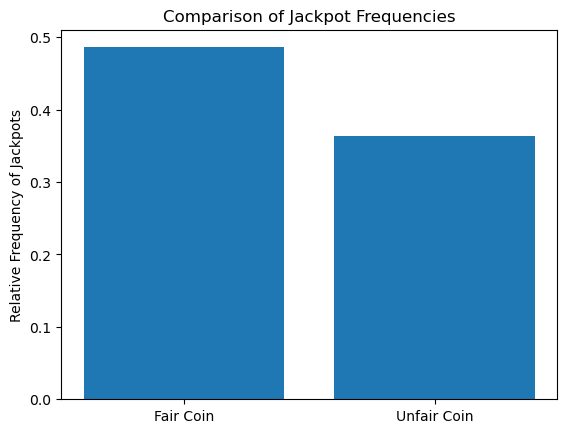

In [23]:
import matplotlib.pyplot as plt

labels = ['Fair Coin', 'Unfair Coin']
values = [relative_fair, relative_unfair]

plt.bar(labels, values)
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Comparison of Jackpot Frequencies')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [24]:
dice_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
dice_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
dice_3 = Die(np.array([1, 2, 3, 4, 5, 6]))

print(f"Dice 1: {dice_1.show()}")
print(f"Dice 2: {dice_2.show()}")
print(f"Dice 3: {dice_3.show()}")

Dice 1:        weights
faces         
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
Dice 2:        weights
faces         
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
Dice 3:        weights
faces         
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [30]:
dice_2.change_weight(6, 5)
print(f"Unfair Dice 2: {dice_2.show()}")

Unfair Dice 2:        weights
faces         
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [33]:
dice_3.change_weight(1, 5)
print(f"Unfair Dice 3: {dice_3.show()}")

Unfair Dice 3:        weights
faces         
1          5.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [34]:
game_five_fair = Game([dice_1, dice_2, dice_3, dice_1, dice_2])
results_five_fair = game_five_fair.play(10000)
print("Five Fair Dice Results:\n", results_five_fair.head())

Five Fair Dice Results:
    0  1  2  3  4
0  4  2  3  3  6
1  2  6  1  5  6
2  5  2  1  5  3
3  3  1  1  6  4
4  2  4  1  3  6


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [35]:
game_five_unfair = Game([dice_2, dice_3, dice_1, dice_2, dice_3])
results_five_unfair = game_five_unfair.play(10000)
print("Five Dice (with Unfair) Results:\n", results_five_unfair.head())

Five Dice (with Unfair) Results:
    0  1  2  3  4
0  4  1  1  4  1
1  5  2  1  5  2
2  2  5  1  6  4
3  3  1  2  3  1
4  6  1  2  1  6


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

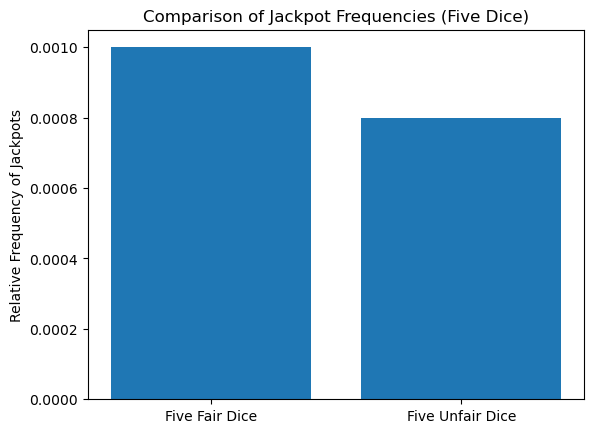

In [36]:
analyzer_five_fair = Analyzer(game_five_fair)
jackpot_five_fair = analyzer_five_fair.jackpot()

analyzer_five_unfair = Analyzer(game_five_unfair)
jackpot_five_unfair = analyzer_five_unfair.jackpot()

relative_five_fair = jackpot_five_fair / 10000
relative_five_unfair = jackpot_five_unfair / 10000

labels = ['Five Fair Dice', 'Five Unfair Dice']
values = [relative_five_fair, relative_five_unfair]

plt.bar(labels, values)
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Comparison of Jackpot Frequencies (Five Dice)')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [56]:
with open('english_letters.txt') as file:
    letter_freq = file.read().splitlines()

letters = []
weights = []

for line in letter_freq:
    letter, freq = line.split()
    letters.append(letter)
    weights.append(int(freq))

letters = np.array(letters)
weights = np.array(weights)

print(letters)
print(weights)

['E' 'T' 'A' 'O' 'I' 'N' 'S' 'R' 'H' 'L' 'D' 'C' 'U' 'M' 'F' 'G' 'P' 'W'
 'Y' 'B' 'V' 'K' 'J' 'X' 'Z' 'Q']
[529117365 390965105 374061888 326627740 320410057 313720540 294300210
 277000841 216768975 183996130 169330528 138416451 117295780 110504544
  95422055  91258980  90376747  79843664  75294515  70195826  46337161
  35373464   9613410   8369915   4975847   4550166]


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [58]:
with open('english_letters.txt') as file:
    letter_freq = file.read().splitlines()

letters = []
weights = []

for line in letter_freq:
    letter, freq = line.split()
    letters.append(letter)
    weights.append(int(freq))

letters = np.array(letters)
weights = np.array(weights)

def roll_die(faces, weights):
    return random.choices(faces, weights=weights, k=1)[0]

def play_game(letters, weights, num_rolls=1000, num_dice=4):
    results = []
    for _ in range(num_rolls):
        roll_result = [roll_die(letters, weights) for _ in range(num_dice)]
        results.append(roll_result)
    return results

game_results = play_game(letters, weights, num_rolls=1000, num_dice=4)

print("Game Results (first 10 rolls):")
print(game_results[:10])
print(f"Total rolls: {len(game_results)}")

Game Results (first 10 rolls):
[['N', 'L', 'A', 'O'], ['T', 'O', 'G', 'N'], ['E', 'Y', 'I', 'E'], ['E', 'U', 'T', 'L'], ['Y', 'E', 'U', 'S'], ['E', 'N', 'B', 'N'], ['D', 'B', 'B', 'I'], ['U', 'W', 'D', 'E'], ['E', 'N', 'E', 'C'], ['U', 'R', 'E', 'A']]
Total rolls: 1000


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [12]:
import itertools

with open('scrabble_words.txt') as file:
    scrabble_words = set(file.read().splitlines())

def is_valid_word(word, scrabble_words):
    return word in scrabble_words

def count_valid_words_in_permutations(game_results, scrabble_words):
    valid_words_count = 0
    invalid_words_count = 0

    for roll in game_results:
        roll_str = ''.join(roll)  
        for word_len in range(1, len(roll_str) + 1):
            for perm in itertools.permutations(roll_str, word_len):
                word = ''.join(perm)
                if is_valid_word(word, scrabble_words):
                    valid_words_count += 1
                else:
                    invalid_words_count += 1

    return valid_words_count, invalid_words_count

def play_game_with_dice(letters, weights, num_rolls=1000, num_dice=4):
    game_results = []
    for _ in range(num_rolls):
        roll_result = [roll_die(letters, weights) for _ in range(num_dice)]
        game_results.append(roll_result)
    return game_results

def roll_die(letters, weights):
    import random
    return random.choices(letters, weights, k=1)[0]

game_results_4_dice = play_game_with_dice(letters, weights, num_rolls=1000, num_dice=4)

valid_words_4, invalid_words_4 = count_valid_words_in_permutations(game_results_4_dice, scrabble_words)
print(f"4 Dice: Valid words = {valid_words_4}, Invalid words = {invalid_words_4}")

4 Dice: Valid words = 11205, Invalid words = 52795


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [8]:
game_results_5_dice = play_game_with_dice(letters, weights, num_rolls=1000, num_dice=5)

valid_words_5, invalid_words_5 = count_valid_words_in_permutations(game_results_5_dice, scrabble_words)
print(f"5 Dice: Valid words = {valid_words_5}, Invalid words = {invalid_words_5}")

if valid_words_4 > valid_words_5:
    print(f"4 dice produced more valid words.")
else:
    print(f"5 dice produced more valid words.")

5 Dice: Valid words = 27525, Invalid words = 297475
5 dice produced more valid words.
